# Using TLUSTY synthetic spectra

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import VPtools as vp

In [3]:
path = "/Users/vpetit/ASTRO/ReferenceMaterial/TLUSTY/OSTAR2002/Gvispec"

flux, cont = vp.tlusty.read(path+'/G27500g300v10.vis')

spec = vp.tlusty.read_norm(path+'/G27500g300v10.vis')


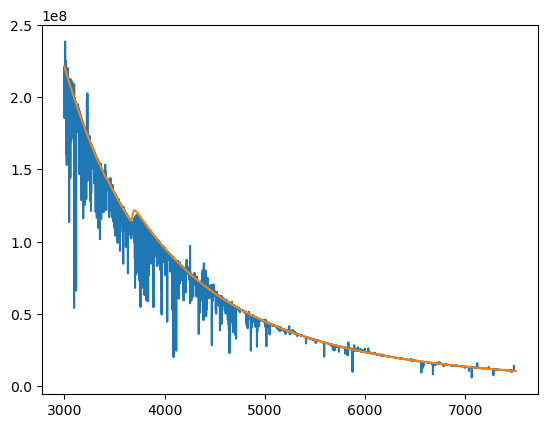

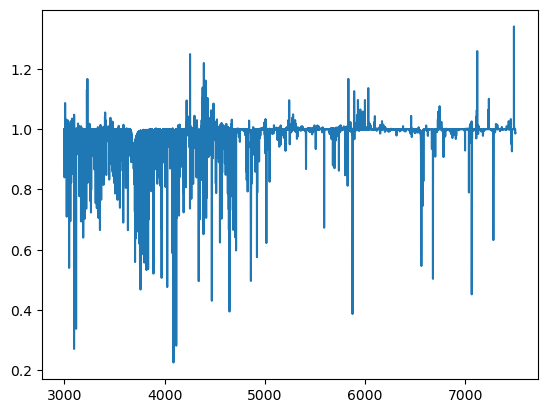

In [4]:
fig, ax = plt.subplots(1,1)

ax.plot(flux.wl, flux.specI)
ax.plot(cont.wl, cont.specI)

fig, ax = plt.subplots(1,1)

ax.plot(spec.wl, spec.specI)